In [23]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Checking for Missing Values

In [24]:
#Importing dataset
diabetes_raw = pd.read_csv('/content/drive/MyDrive/data/diabetes (1).csv')
diabetes_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
#Checking for missing values
diabetes_raw.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [26]:
#Defining columns with missing values
missing_values = ['Insulin', 'SkinThickness', 'BloodPressure', 'Glucose', 'BMI']

In [27]:
#Replacing 0's with NaN
diabetes_raw[missing_values] = diabetes_raw[missing_values].replace(0,np.nan)

In [28]:
#Rechecking missing values in each varible
diabetes_raw.isna().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Confirmed missing values, we will now use sk learn to imputate missing values.

## Missing value imputation

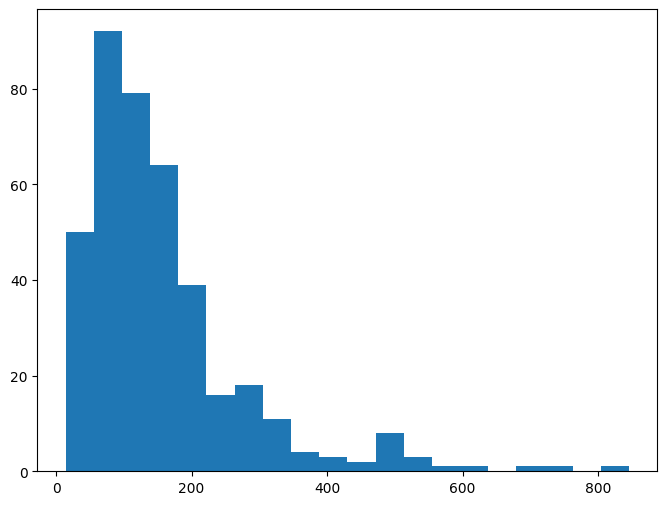

In [29]:
#Plotting Insulin as an example before imputation
plt.figure(figsize=(8,6))
plt.hist(x=diabetes_raw['Insulin'], bins=20)
plt.show()

In [30]:
#Using Iterative Imputer
imputer = IterativeImputer(max_iter=10, random_state=0)

In [31]:
#Transforming missing values
diabetes_imputed_array = imputer.fit_transform(diabetes_raw)

In [32]:
#Creating a copy of the dataset imputed missing values
diabetes_imputed = pd.DataFrame(diabetes_imputed_array, columns = diabetes_raw.columns)

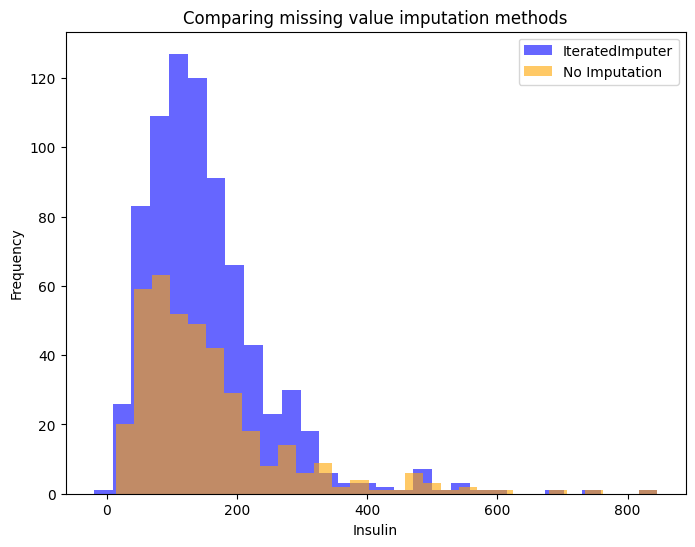

In [33]:
#Comparing the raw dataset with missing values vs dataset with imputed missing values
plt.figure(figsize=(8,6))
plt.hist(x=diabetes_imputed['Insulin'], bins=30, alpha=0.6, color = 'blue')
plt.hist(x=diabetes_raw['Insulin'], bins=30, alpha=0.6, color = 'orange')
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.title('Comparing missing value imputation methods')
plt.legend(['IteratedImputer','No Imputation'])
plt.show()

In [34]:
#After imputation
diabetes_imputed.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [35]:
#Checking updated dataset
diabetes_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,218.903553,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,70.314661,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,21.542781,268.507178,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0


In [40]:
#Downloading Imputed dataset
diabetes_imputed.to_csv('Imputed Dataset.csv')